In [1]:
# https://github.com/MISHRA19/Computing-Max-Drawdown-with-Python/blob/master/Max%20Drawdown.ipynb

!pip install yfinance
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 6.4 MB 14.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [20]:
df = yfinance.download("FB",period="30y")
returns = df['Adj Close'].pct_change(1).fillna(0).to_numpy()
df['returns'] = df['Adj Close'].pct_change(1).fillna(0)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETH: No data found, symbol may be delisted


In [3]:
# Let’s now consider 5 years of future trading days to simulate. Let’s consider 1 year
#  as made of 253 days. Since we want to calculate the future equity lines, we need to 
#  start from a price. Let’s consider, as a starting point, the last closing price.

forward_days = 5 * 253  
start_price = float(df['Adj Close'].tail(1))

In [4]:
simulated = np.random.choice(returns,size=forward_days,replace=True)
simulated_equity = start_price *(1+simulated).cumprod()
rolling_max = np.maximum.accumulate(simulated_equity)
max_dd = np.max((rolling_max - simulated_equity)/rolling_max)
max_dd

0.34916290350318185

In [5]:
rolling_max = np.maximum.accumulate(returns)
max_dd = np.max((rolling_max - returns)/rolling_max)
max_dd

3.9824503602205152

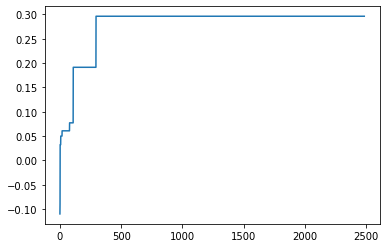

In [6]:
plt.plot(rolling_max)

In [7]:
def Drawdown(return_series: pd.Series):
    """
    Documentation String:
    Takes a Timeseries of Equity return.
    Computes and returns a Data frame with:
    1. Wealth index
    2. Previous peaks
    3. Percentage Drawdown
    """
    wealth_index= 1000*(1+return_series).cumprod()
    previous_peaks=wealth_index.cummax()
    drawdown=(wealth_index-previous_peaks)/previous_peaks
    
    return pd.DataFrame({
        "Wealth": wealth_index,
        "peaks": previous_peaks,
        "Drawdown": drawdown
    })

In [14]:
Drawdown(df['returns']).head()


,Wealth,peaks,Drawdown
Date,,,
2012-05-18,1000.000000,1000.0,0.000000
2012-05-21,890.138613,1000.0,-0.109861
2012-05-22,810.881516,1000.0,-0.189118
2012-05-23,837.038985,1000.0,-0.162961
2012-05-24,863.981145,1000.0,-0.136019


Text(0, 0.5, 'Wealth Vs Peaks')

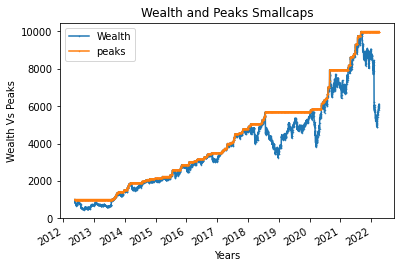

In [15]:
"""Lets plot the Data by calling plot instead of head function"""

ax=Drawdown(df['returns'])[["Wealth","peaks"]].plot(marker='.', markersize=1,title="Wealth and Peaks Smallcaps")
ax.set_xlabel("Years")
ax.set_ylabel("Wealth Vs Peaks")

<Figure size 864x360 with 0 Axes>

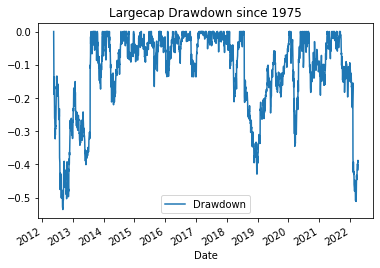

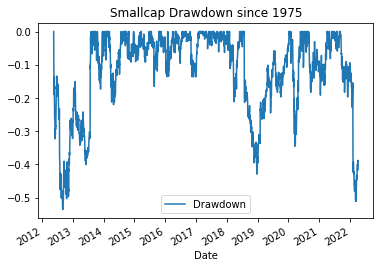

In [17]:
plt.figure(figsize=(12,5))
ax1=Drawdown(df['returns'])[["Drawdown"]].plot(title="Largecap Drawdown since 1975")
ax2=Drawdown(df['returns'])[["Drawdown"]].plot(title="Smallcap Drawdown since 1975")

plt.show()

In [19]:
Drawdown(df['returns'])["Drawdown"].idxmin()


Timestamp('2012-09-04 00:00:00')

In [18]:
Drawdown(df['returns'])["Drawdown"].min()

-0.5362280995413482